In [1]:
import sys
sys.path.insert(0, '../../')

import joblib
import pandas as pd
import numpy as np

from pdpbox.info_plots import target_plot
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## test multi-class classifier

In [2]:
test_otto = joblib.load('test_otto.pkl')

otto_data = test_otto['data']
otto_features = test_otto['features']
otto_target = test_otto['target']
otto_model = test_otto['rf_model']

# test target_plot

#### (model: multi-class, feature_type: numeric)

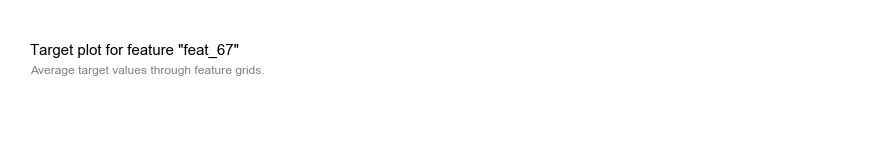

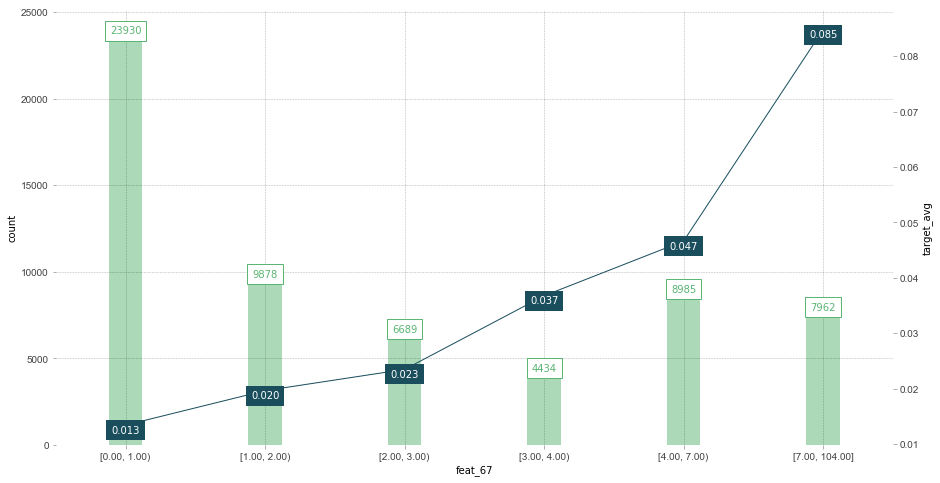

In [3]:
axes, df = target_plot(df=otto_data, feature='feat_67', feature_name='feat_67', target='target_0', figsize=(15, 8))

In [4]:
df

,x,display_column,count,target_0
0,0,"[0.00, 1.00)",23930,0.013414
1,1,"[1.00, 2.00)",9878,0.019640
2,2,"[2.00, 3.00)",6689,0.023471
3,3,"[3.00, 4.00)",4434,0.036761
4,4,"[4.00, 7.00)",8985,0.046633
5,5,"[7.00, 104.00]",7962,0.084778


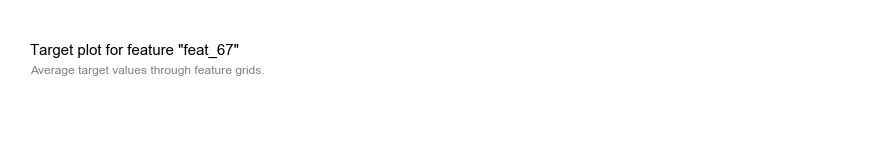

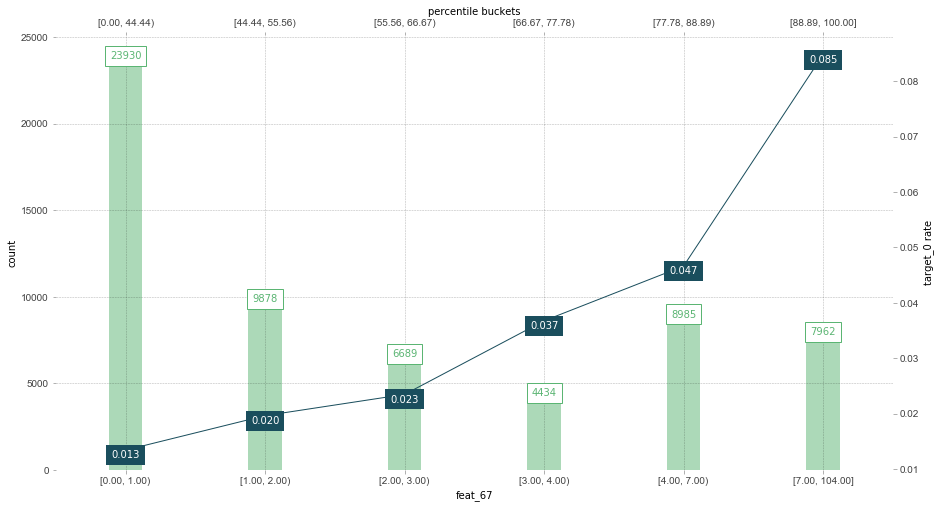

In [5]:
# show percentile
# modify returned axes
axes, _ = target_plot(df=otto_data, feature='feat_67', feature_name='feat_67', target='target_0', 
                      show_percentile=True, figsize=(15, 8))
_ = axes[2].set_ylabel('target_0 rate')

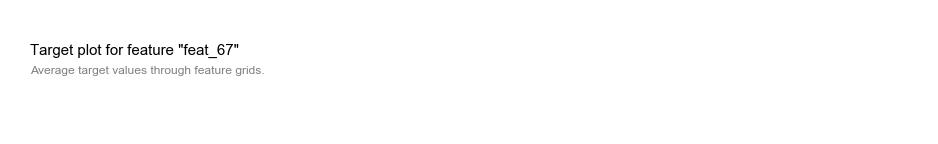

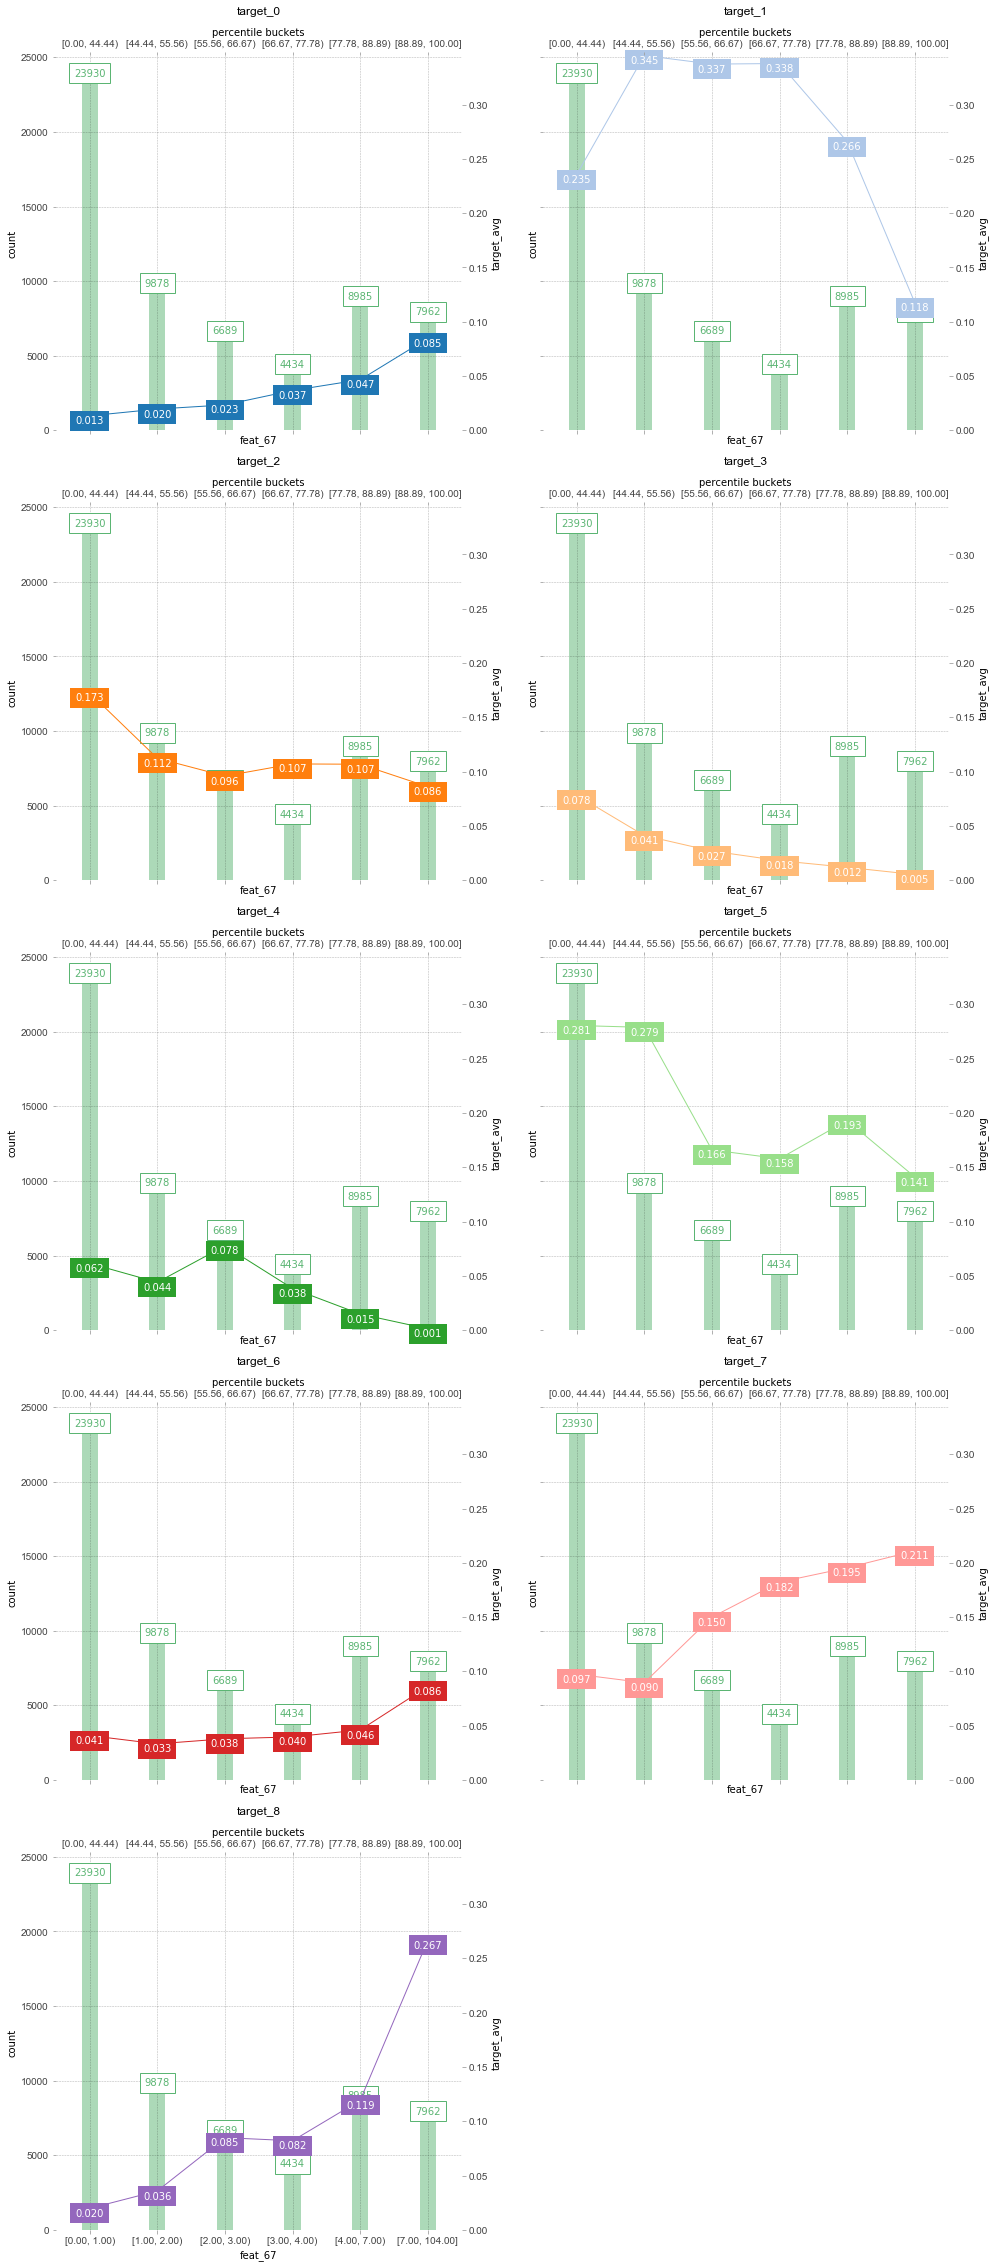

In [6]:
# multiple targets
axes, df = target_plot(df=otto_data, feature='feat_67', feature_name='feat_67', target=['target_%d' %(i) for i in range(9)], 
                   show_percentile=True, figsize=(16, 40))

In [7]:
df

,x,display_column,percentile_column,count,target_0,target_1,target_2,target_3,target_4,target_5,target_6,target_7,target_8
0,0,"[0.00, 1.00)","[0.00, 44.44)",23930,0.013414,0.235395,0.172628,0.078354,0.061513,0.280527,0.040953,0.097451,0.019766
1,1,"[1.00, 2.00)","[44.44, 55.56)",9878,0.019640,0.345212,0.112371,0.041203,0.044037,0.278801,0.033306,0.089593,0.035837
2,2,"[2.00, 3.00)","[55.56, 66.67)",6689,0.023471,0.337270,0.095978,0.026910,0.077590,0.165944,0.037973,0.149948,0.084916
3,3,"[3.00, 4.00)","[66.67, 77.78)",4434,0.036761,0.337844,0.107127,0.018042,0.038340,0.157871,0.039693,0.182228,0.082093
4,4,"[4.00, 7.00)","[77.78, 88.89)",8985,0.046633,0.265888,0.106845,0.011909,0.014802,0.193100,0.046077,0.195437,0.119310
5,5,"[7.00, 104.00]","[88.89, 100.00]",7962,0.084778,0.117558,0.086159,0.005275,0.001256,0.141045,0.086159,0.211002,0.266767


In [8]:
column_name = 'feat_67'
for i in range(df.shape[0]):
    item = df.iloc[i]
    range_numeric = np.array(item['display_column'].replace('[', '').replace(']', '').replace(
        ')', '').split(', ')).astype(np.float64)
    
    subset = otto_data[(otto_data[column_name] >= range_numeric[0]) 
                       & (otto_data[column_name] < range_numeric[1])]
    if i == df.shape[0] - 1:
        subset = otto_data[(otto_data[column_name] >= range_numeric[0]) 
                           & (otto_data[column_name] <= range_numeric[1])]
        
    print(item['display_column'], subset.shape[0], subset[['target_%d' %(i) for i in range(9)]].mean().values)

('[0.00, 1.00)', 23930, array([0.01341412, 0.2353949 , 0.1726285 , 0.07835353, 0.06151275,
       0.28052654, 0.04095278, 0.0974509 , 0.01976598]))
('[1.00, 2.00)', 9878, array([0.0196396 , 0.34521158, 0.11237093, 0.04120267, 0.04403725,
       0.27880138, 0.03330634, 0.08959304, 0.03583721]))
('[2.00, 3.00)', 6689, array([0.02347137, 0.33727015, 0.09597847, 0.02690985, 0.07759007,
       0.16594409, 0.03797279, 0.14994768, 0.08491553]))
('[3.00, 4.00)', 4434, array([0.03676139, 0.33784393, 0.10712675, 0.0180424 , 0.0383401 ,
       0.157871  , 0.03969328, 0.18222824, 0.08209292]))
('[4.00, 7.00)', 8985, array([0.04663328, 0.26588759, 0.10684474, 0.01190874, 0.01480245,
       0.19309961, 0.04607679, 0.19543684, 0.11930996]))
('[7.00, 104.00]', 7962, array([0.08477769, 0.1175584 , 0.08615926, 0.00527506, 0.00125597,
       0.14104496, 0.08615926, 0.21100226, 0.26676714]))


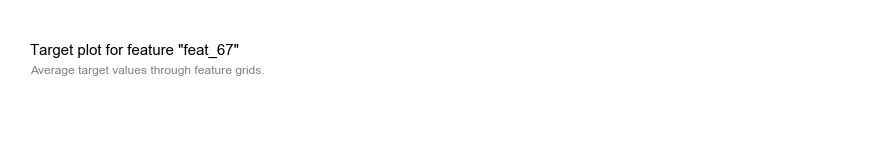

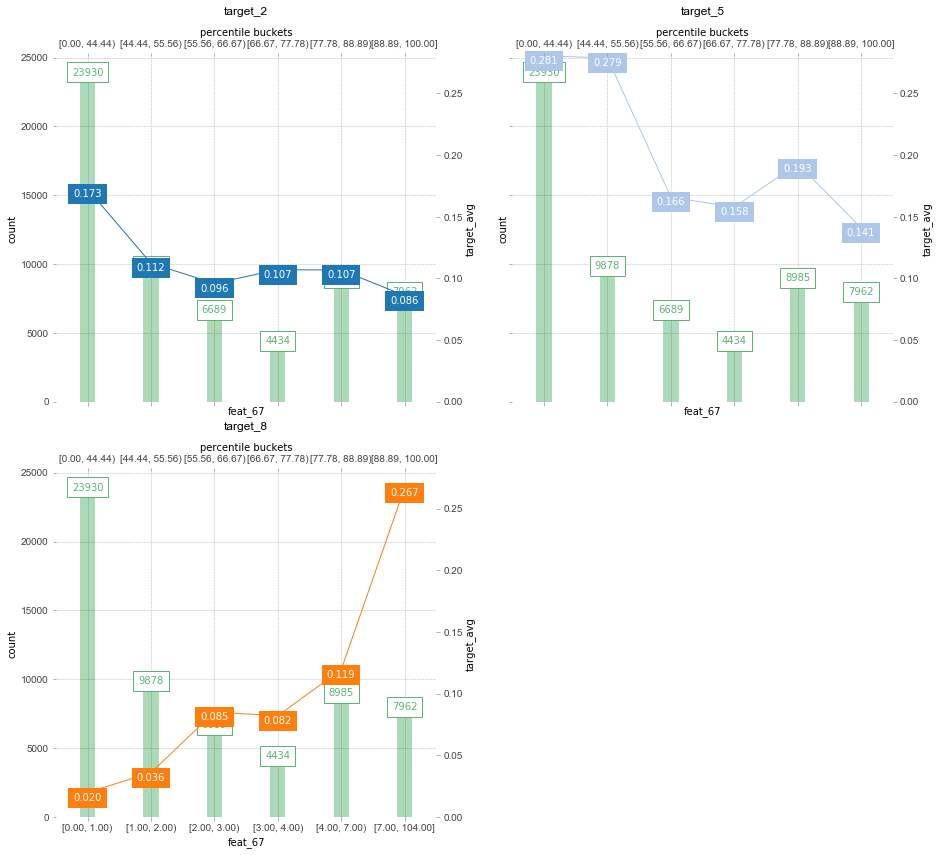

In [9]:
# subset of targets
axes, df = target_plot(df=otto_data, feature='feat_67', feature_name='feat_67', 
                       target=['target_%d' %(i) for i in [2, 5, 8]], show_percentile=True, figsize=(15, 14))

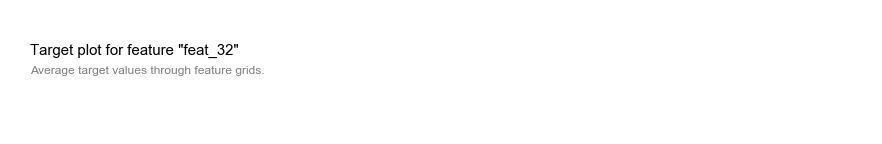

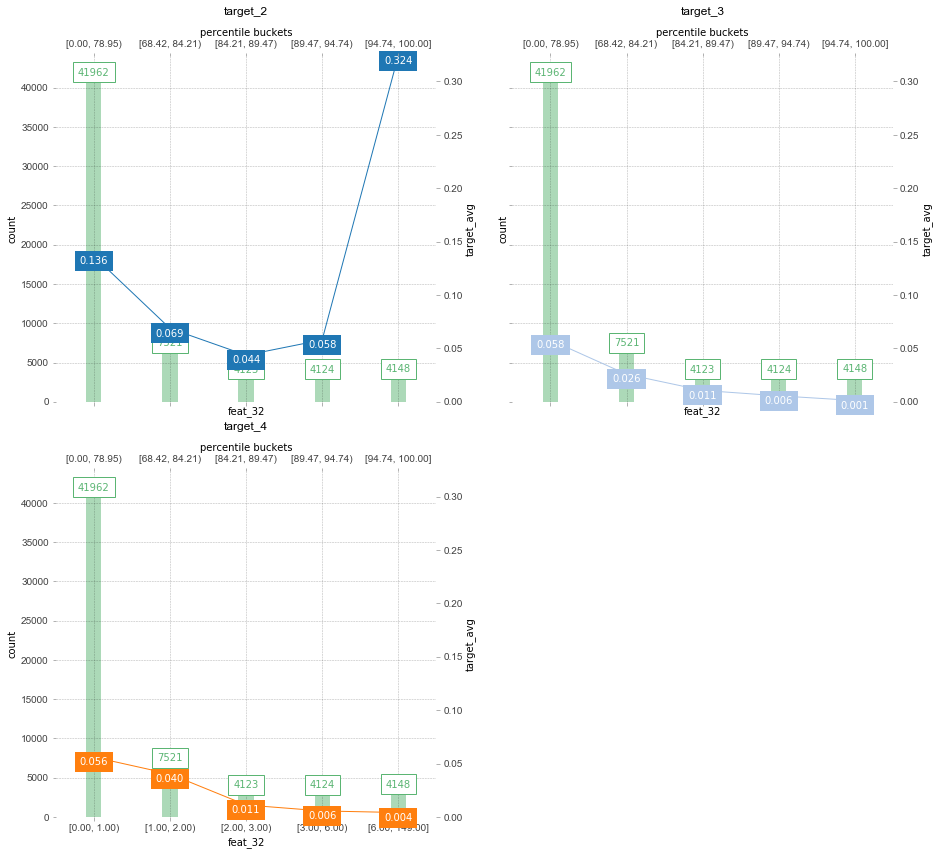

In [10]:
_ = target_plot(df=otto_data, feature='feat_32', feature_name='feat_32', target=['target_2', 'target_3', 'target_4'], 
                num_grid_points=20, show_percentile=True, figsize=(15, 14))

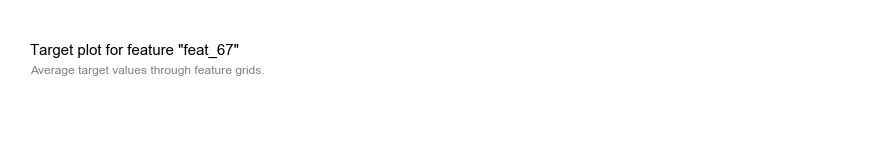

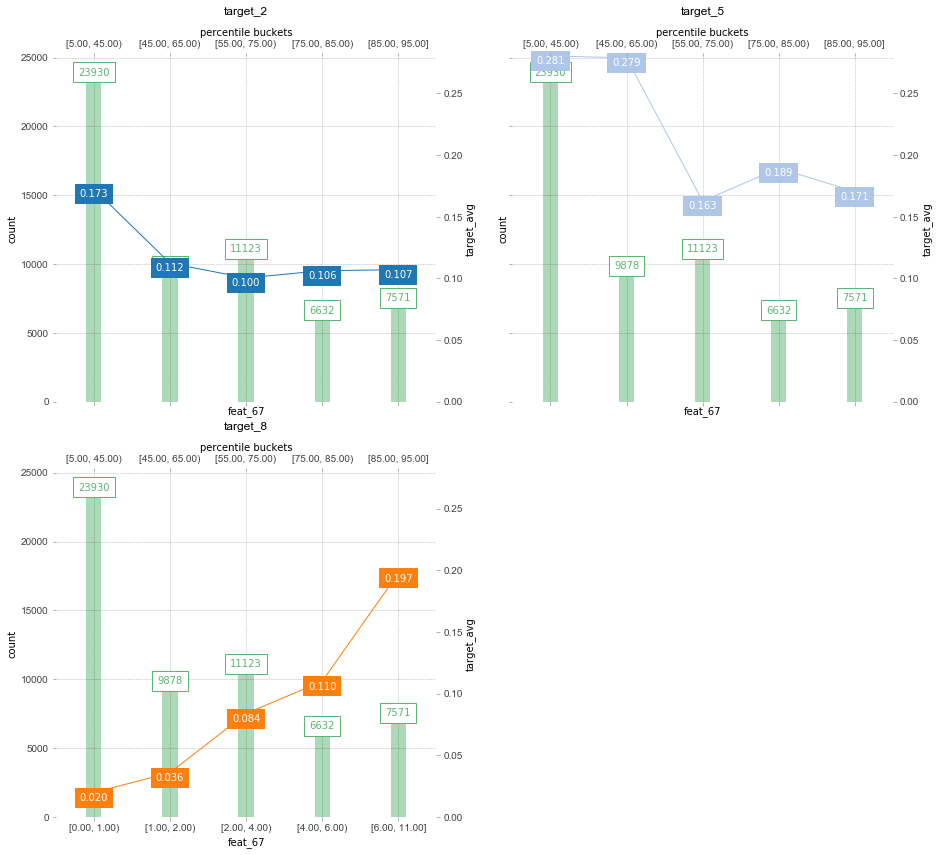

In [11]:
# percentile_range
axes = target_plot(df=otto_data, feature='feat_67', feature_name='feat_67', target=['target_2', 'target_5', 'target_8'], 
                   num_grid_points=10, grid_type='percentile', percentile_range=(5, 95), figsize=(15, 14), show_percentile=True)

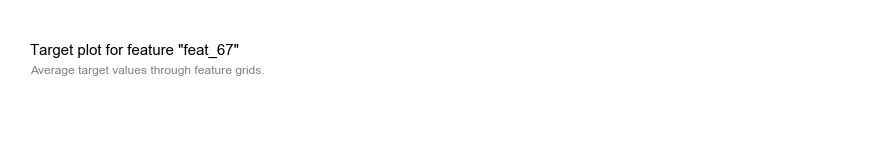

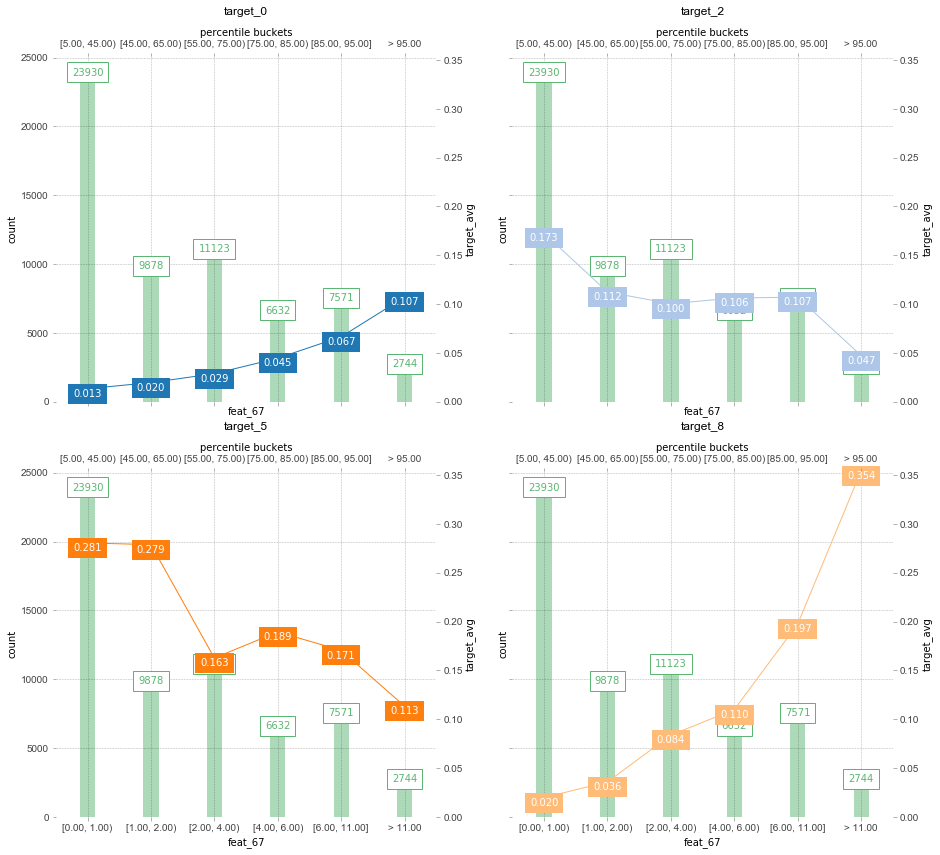

In [12]:
# percentile_range
_ = target_plot(df=otto_data, feature='feat_67', feature_name='feat_67', 
                target=['target_0', 'target_2', 'target_5', 'target_8'], 
                num_grid_points=10, grid_type='percentile', percentile_range=(5, 95), figsize=(15, 14), 
                show_percentile=True, show_outliers=True)

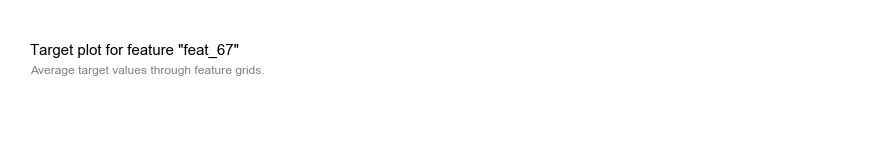

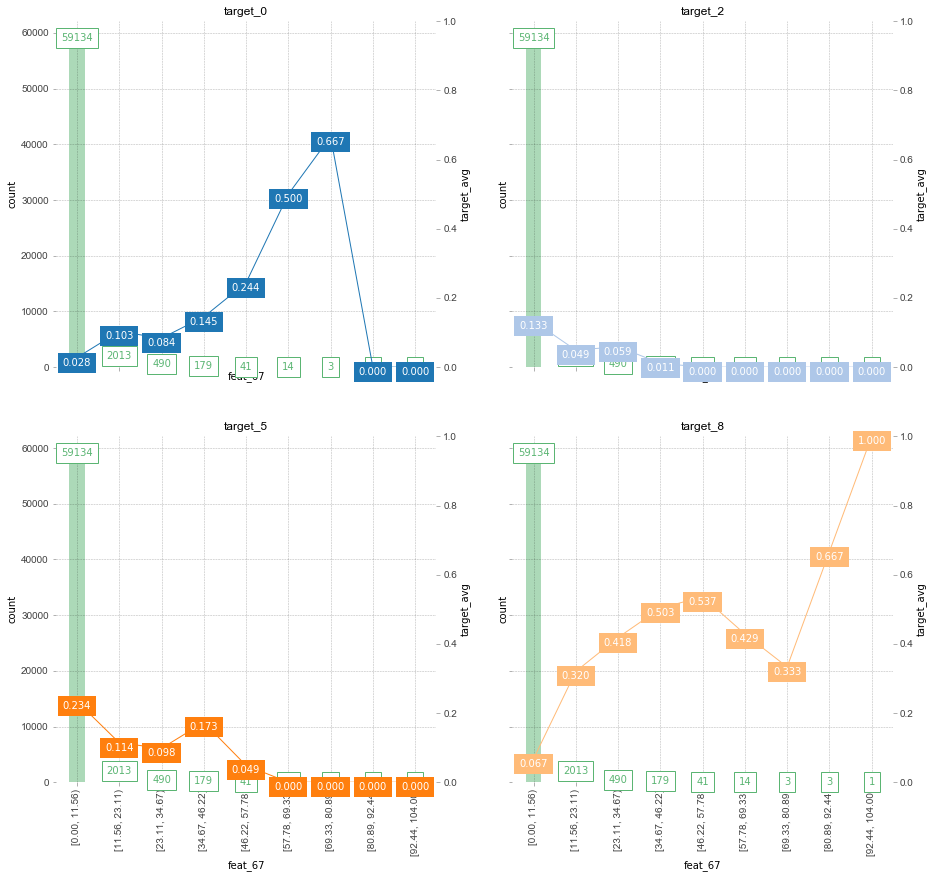

In [13]:
# equal grid_type
_ = target_plot(df=otto_data, feature='feat_67', feature_name='feat_67', target=['target_0', 'target_2', 'target_5', 'target_8'], 
                num_grid_points=10, grid_type='equal', figsize=(15, 14), plot_params={'xticks_rotation': 90})

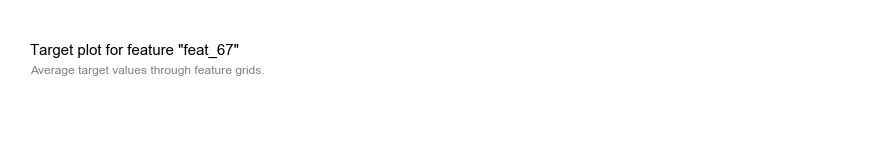

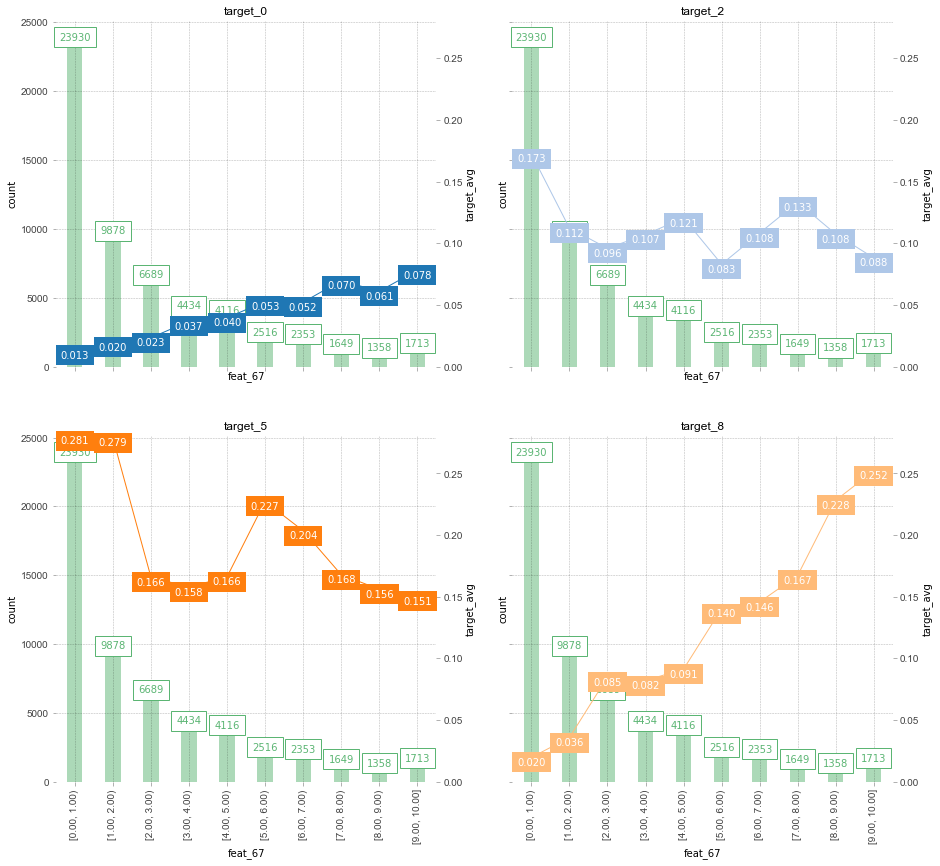

In [14]:
# grid_range
_ = target_plot(df=otto_data, feature='feat_67', feature_name='feat_67', target=['target_0', 'target_2', 'target_5', 'target_8'], 
                num_grid_points=11, grid_type='equal', grid_range=(0, 10), figsize=(15, 14), plot_params={'xticks_rotation': 90})

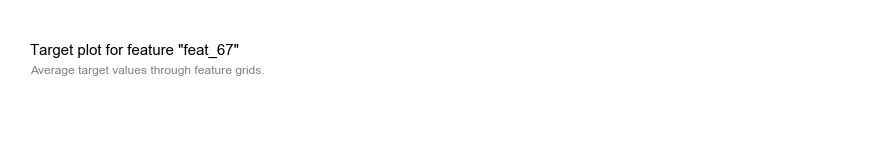

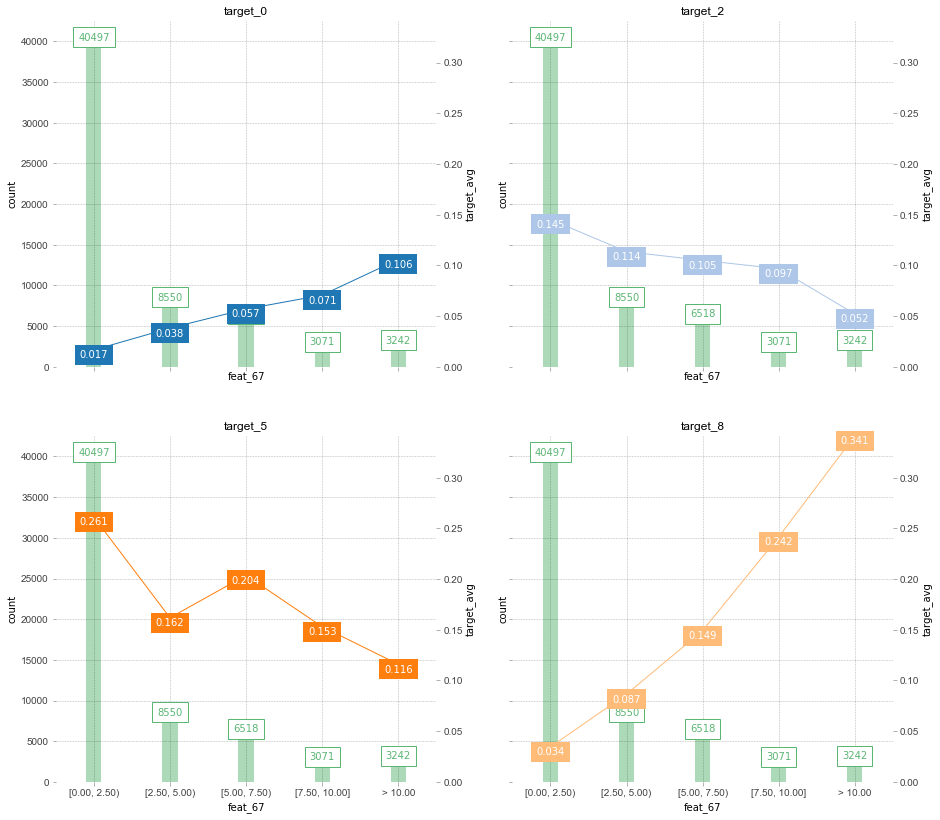

In [15]:
# grid_range and show_outliers
_ = target_plot(df=otto_data, feature='feat_67', feature_name='feat_67', target=['target_0', 'target_2', 'target_5', 'target_8'], 
                num_grid_points=5, grid_type='equal', grid_range=(0, 10), figsize=(15, 14), show_outliers=True)

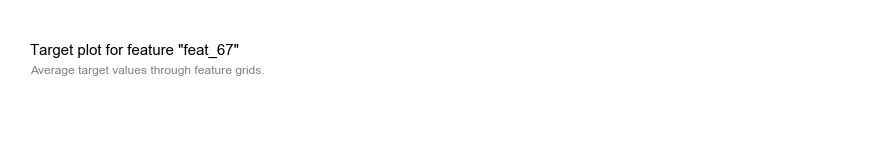

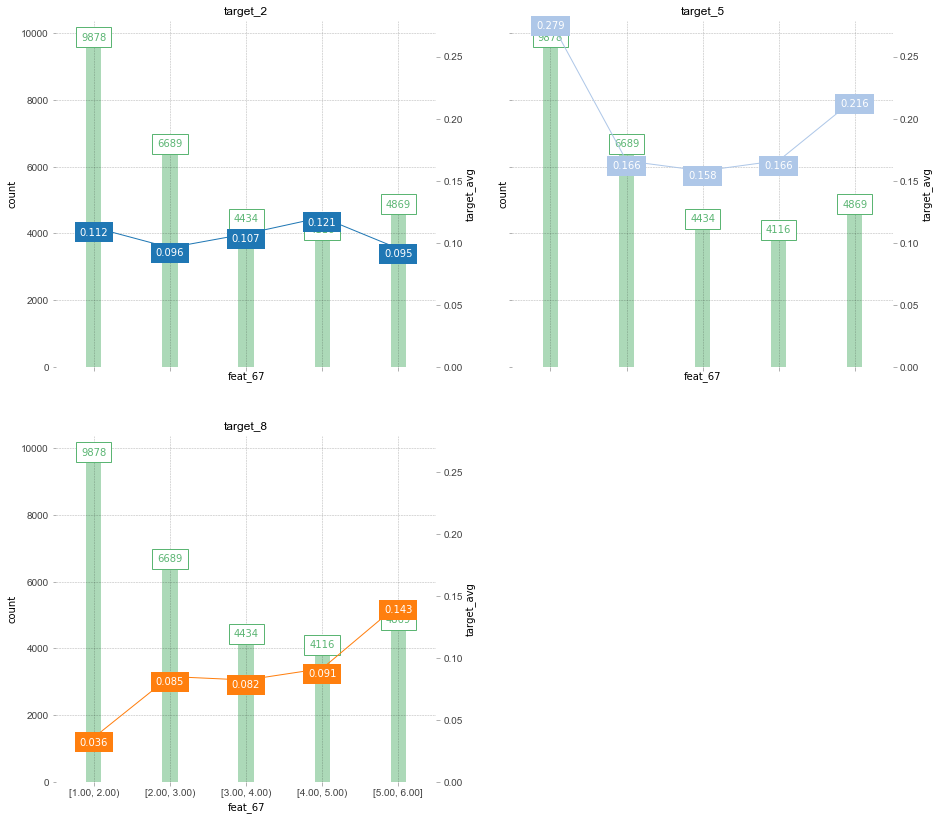

In [16]:
# customized grid points
_ = target_plot(df=otto_data, feature='feat_67', feature_name='feat_67', target=['target_2', 'target_5', 'target_8'], 
                cust_grid_points=range(1, 7), figsize=(15, 14))

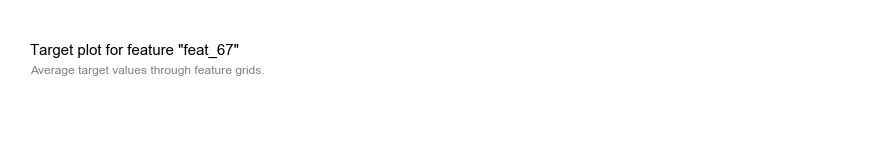

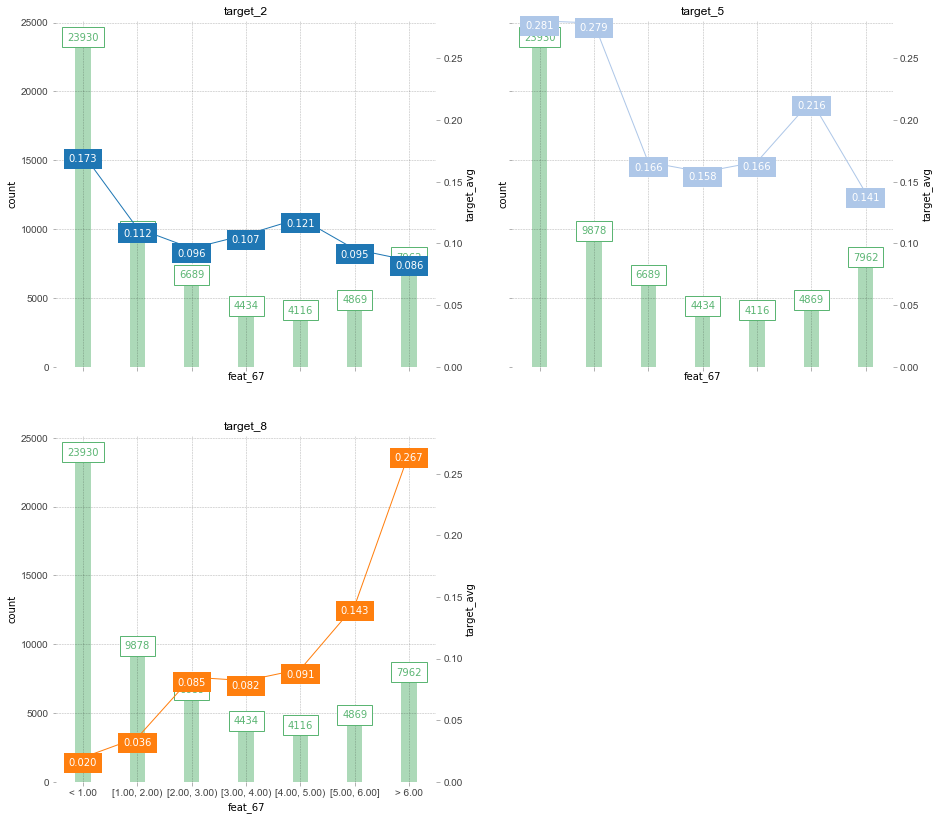

In [17]:
# customized grid points and show_outliers
_ = target_plot(df=otto_data, feature='feat_67', feature_name='feat_67', target=['target_2', 'target_5', 'target_8'], 
                cust_grid_points=range(1, 7), figsize=(15, 14), show_outliers=True)

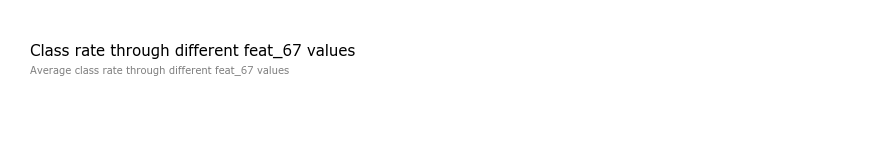

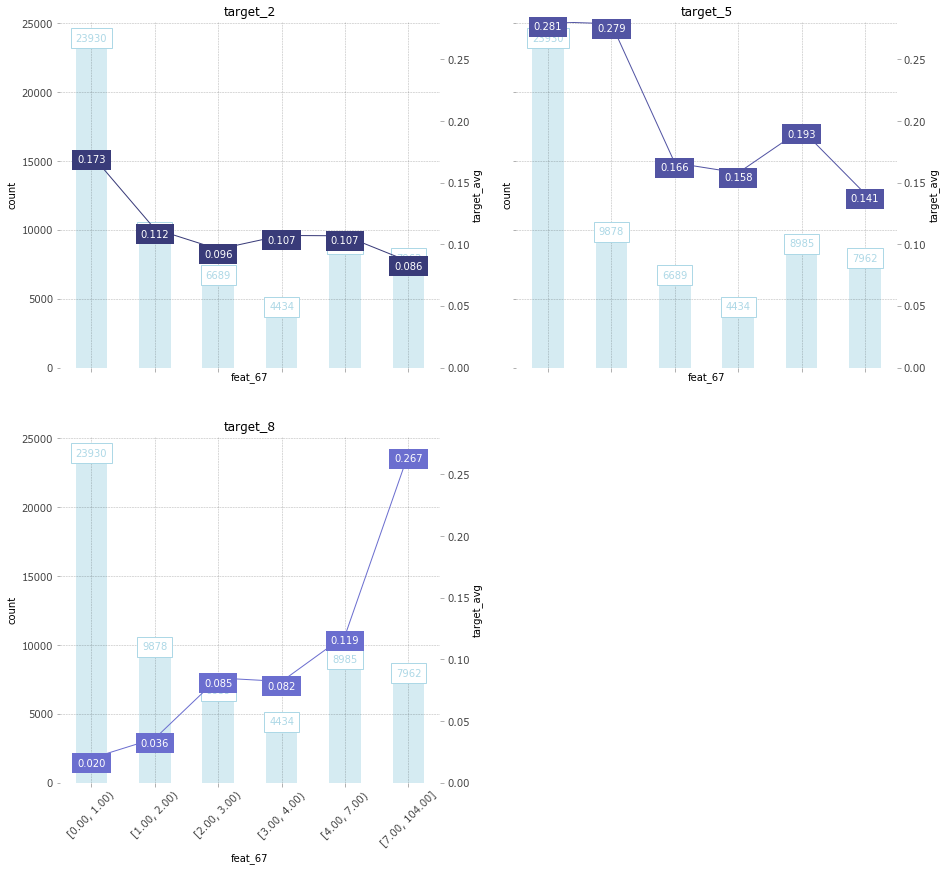

In [18]:
# use plot params
plot_params = {
    'font_family': 'Verdana',
    'title': 'Class rate through different feat_67 values',
    'subtitle': 'Average class rate through different feat_67 values',
    'title_fontsize': 15,
    'subtitle_fontsize': 10,
    'line_width': 1,
    'line_color': '#3288bd',
    'line_colors_cmap': 'tab20b',
    #'line_colors': ['blue', 'green', 'pink', 'red', 'orange'],
    'bar_color': 'lightblue',
    'bar_width': 0.5,
    'xticks_rotation': 45
}
axes = target_plot(df=otto_data, feature='feat_67', feature_name='feat_67', 
                   target=['target_2', 'target_5', 'target_8'], plot_params=plot_params, figsize=(15, 14))

# test target plot interact

In [35]:
from pdpbox.info_plots import target_plot_interact

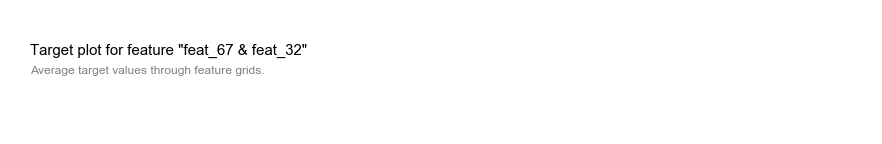

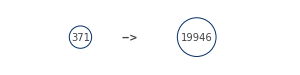

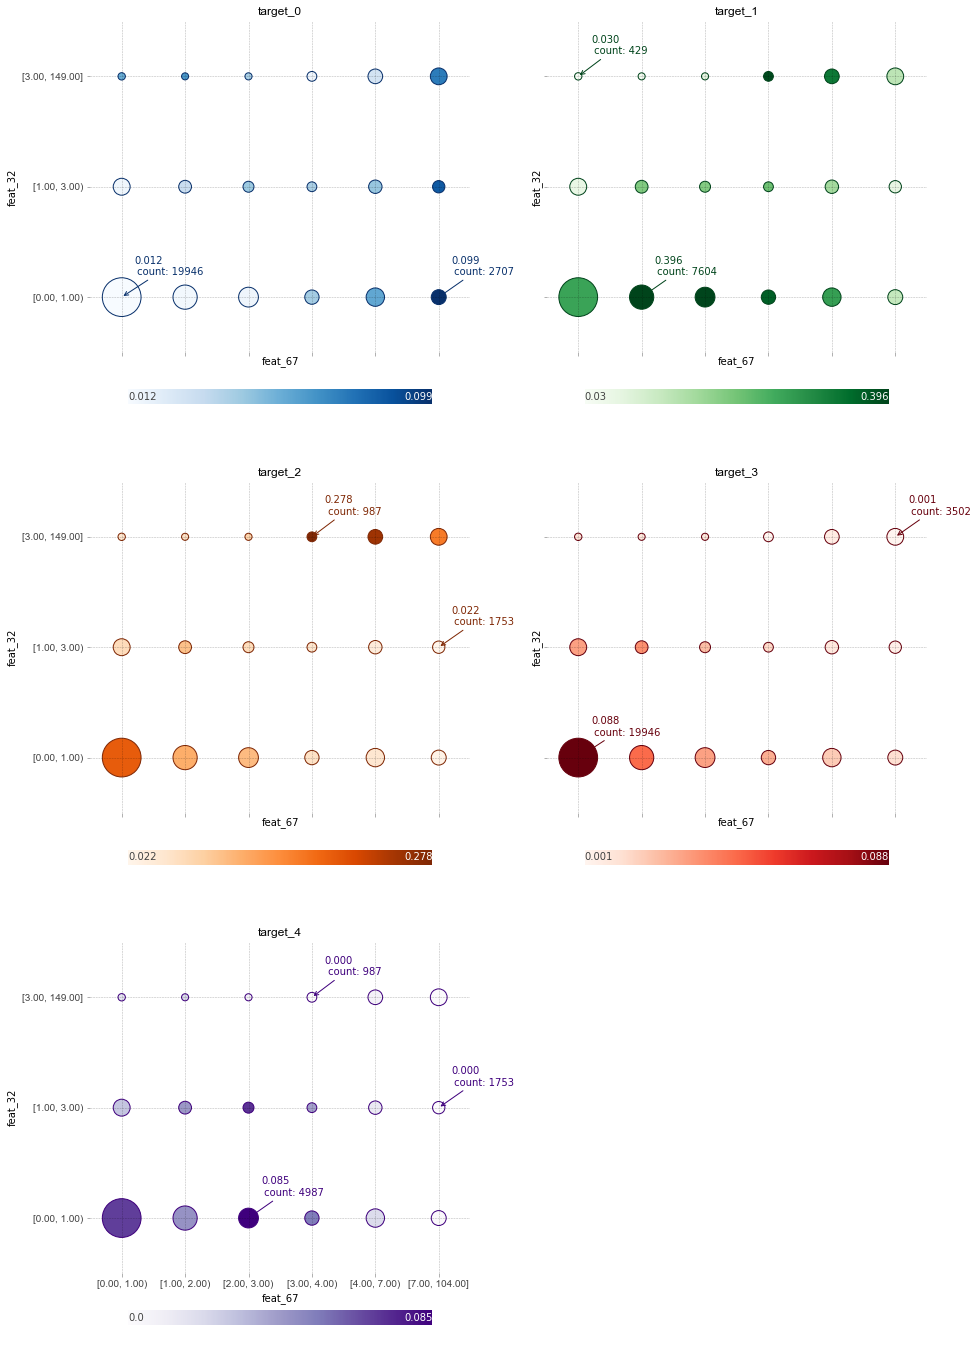

In [36]:
axes, df = target_plot_interact(df=otto_data, features=['feat_67', 'feat_32'], feature_names=['feat_67', 'feat_32'], 
                                target=['target_0', 'target_1', 'target_2', 'target_3', 'target_4'], figsize=(15, 24))

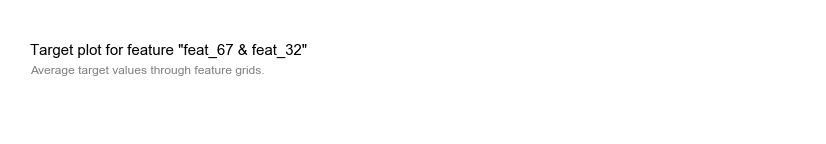

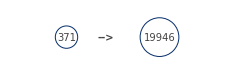

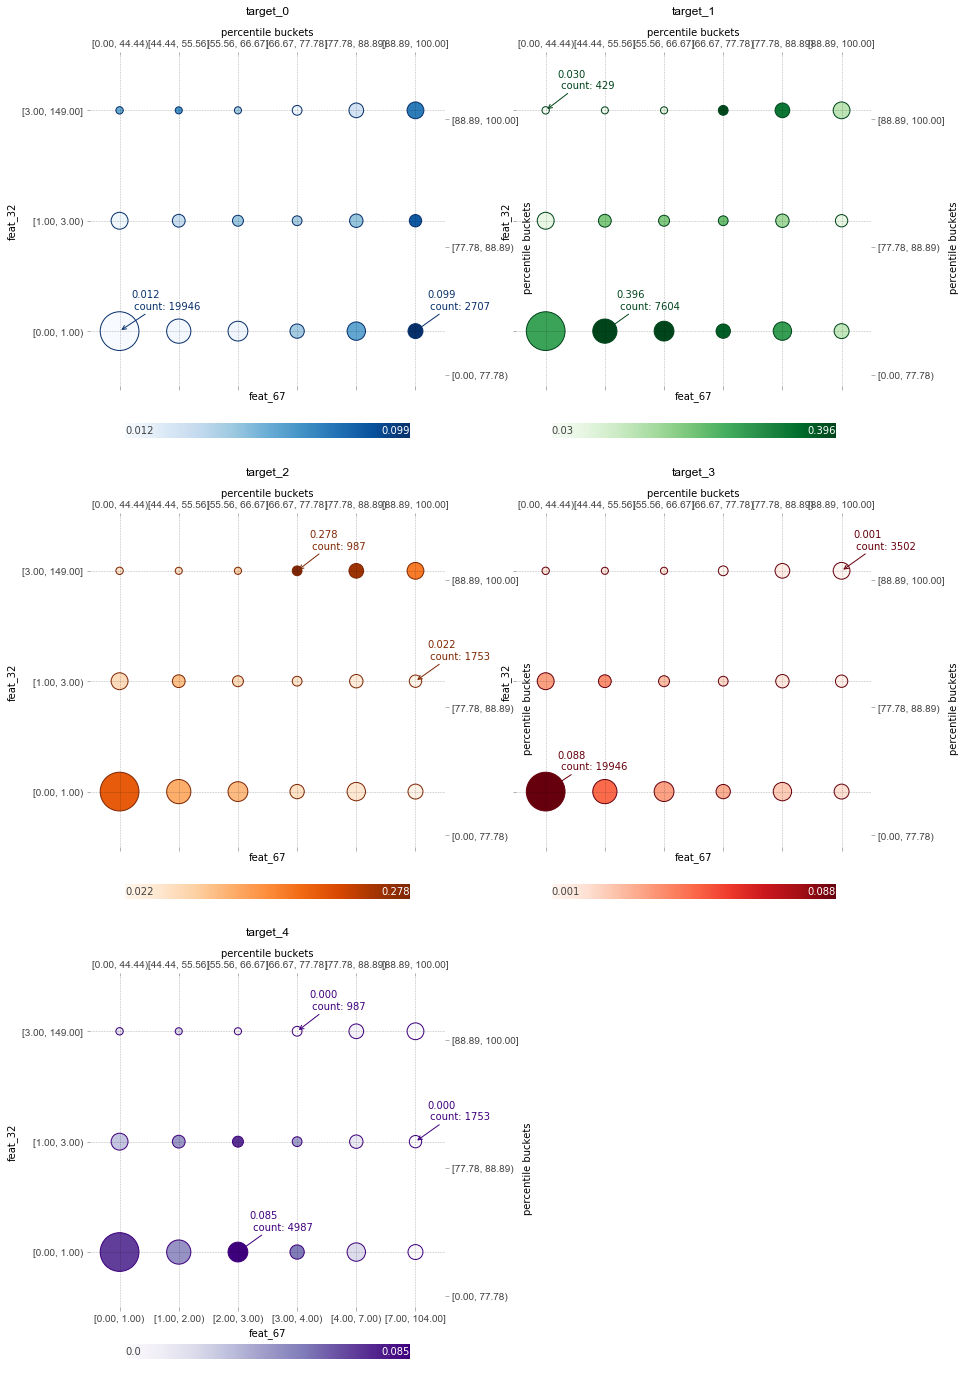

In [37]:
axes, df = target_plot_interact(df=otto_data, features=['feat_67', 'feat_32'], feature_names=['feat_67', 'feat_32'], 
                                target=['target_0', 'target_1', 'target_2', 'target_3', 'target_4'], 
                                figsize=(14, 24), show_percentile=True)

In [38]:
df

,x1,x2,display_column_1,display_column_2,percentile_column_1,percentile_column_2,count,target_0,target_1,target_2,target_3,target_4
0,0,0,"[0.00, 1.00)","[0.00, 1.00)","[0.00, 44.44)","[0.00, 77.78)",19946,0.012083,0.270029,0.193873,0.088439,0.068284
1,0,1,"[0.00, 1.00)","[1.00, 3.00)","[0.00, 44.44)","[77.78, 88.89)",3555,0.015752,0.065823,0.067792,0.030098,0.028973
2,0,2,"[0.00, 1.00)","[3.00, 149.00]","[0.00, 44.44)","[88.89, 100.00]",429,0.055944,0.030303,0.053613,0.009324,0.016317
3,1,0,"[1.00, 2.00)","[0.00, 1.00)","[44.44, 55.56)","[0.00, 77.78)",7604,0.014203,0.396107,0.118096,0.044582,0.045239
4,1,1,"[1.00, 2.00)","[1.00, 3.00)","[44.44, 55.56)","[77.78, 88.89)",1903,0.032580,0.200736,0.099842,0.034157,0.043615
5,1,2,"[1.00, 2.00)","[3.00, 149.00]","[44.44, 55.56)","[88.89, 100.00]",371,0.064690,0.043127,0.059299,0.008086,0.021563
6,2,0,"[2.00, 3.00)","[0.00, 1.00)","[55.56, 66.67)","[0.00, 77.78)",4987,0.016443,0.394024,0.105073,0.029677,0.084620
7,2,1,"[2.00, 3.00)","[1.00, 3.00)","[55.56, 66.67)","[77.78, 88.89)",1319,0.044731,0.198635,0.066717,0.021986,0.071266
8,2,2,"[2.00, 3.00)","[3.00, 149.00]","[55.56, 66.67)","[88.89, 100.00]",383,0.041775,0.075718,0.078329,0.007833,0.007833
9,3,0,"[3.00, 4.00)","[0.00, 1.00)","[66.67, 77.78)","[0.00, 77.78)",2460,0.043089,0.365854,0.060163,0.026423,0.052846


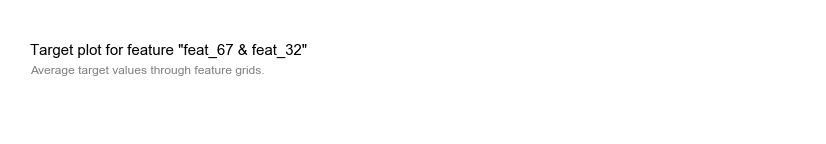

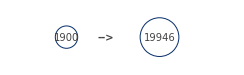

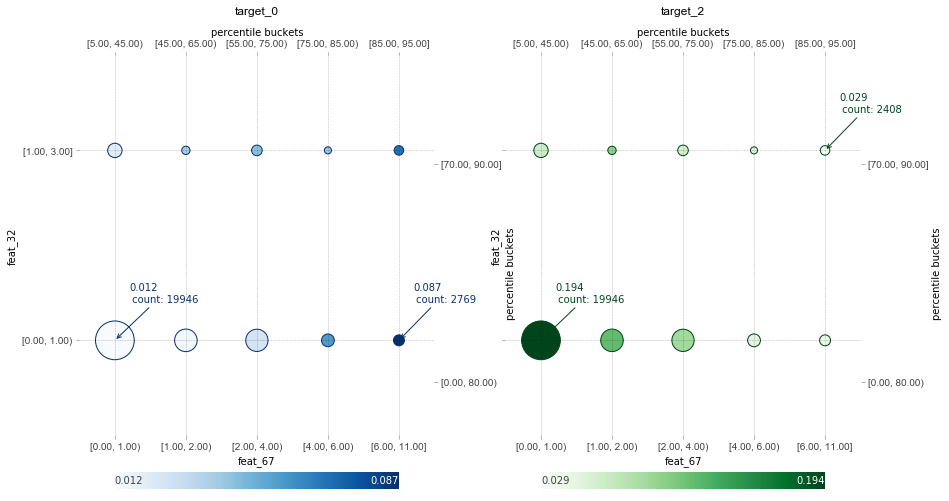

In [40]:
axes, df = target_plot_interact(df=otto_data, features=['feat_67', 'feat_32'], feature_names=['feat_67', 'feat_32'], 
                                target=['target_0', 'target_2'], figsize=(14, 8), 
                                show_percentile=True, percentile_ranges=[(5, 95), (0, 90)])

In [41]:
df

,x1,x2,display_column_1,display_column_2,percentile_column_1,percentile_column_2,count,target_0,target_2
0,0,0,"[0.00, 1.00)","[0.00, 1.00)","[5.00, 45.00)","[0.00, 80.00)",19946,0.012083,0.193873
1,0,1,"[0.00, 1.00)","[1.00, 3.00]","[5.00, 45.00)","[70.00, 90.00]",3846,0.019501,0.065783
2,1,0,"[1.00, 2.00)","[0.00, 1.00)","[45.00, 65.00)","[0.00, 80.00)",7604,0.014203,0.118096
3,1,1,"[1.00, 2.00)","[1.00, 3.00]","[45.00, 65.00)","[70.00, 90.00]",2139,0.037401,0.095372
4,2,0,"[2.00, 4.00)","[0.00, 1.00)","[55.00, 75.00)","[0.00, 80.00)",7447,0.025245,0.090238
5,2,1,"[2.00, 4.00)","[1.00, 3.00]","[55.00, 75.00)","[70.00, 90.00]",2680,0.042910,0.060821
6,3,0,"[4.00, 6.00)","[0.00, 1.00)","[75.00, 85.00)","[0.00, 80.00)",3312,0.055556,0.050121
7,3,1,"[4.00, 6.00)","[1.00, 3.00]","[75.00, 85.00)","[70.00, 90.00]",1900,0.040000,0.048421
8,4,0,"[6.00, 11.00]","[0.00, 1.00)","[85.00, 95.00]","[0.00, 80.00)",2769,0.086674,0.041170
9,4,1,"[6.00, 11.00]","[1.00, 3.00]","[85.00, 95.00]","[70.00, 90.00]",2408,0.067691,0.028654


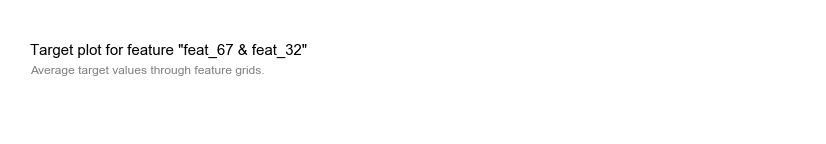

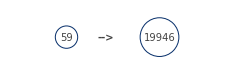

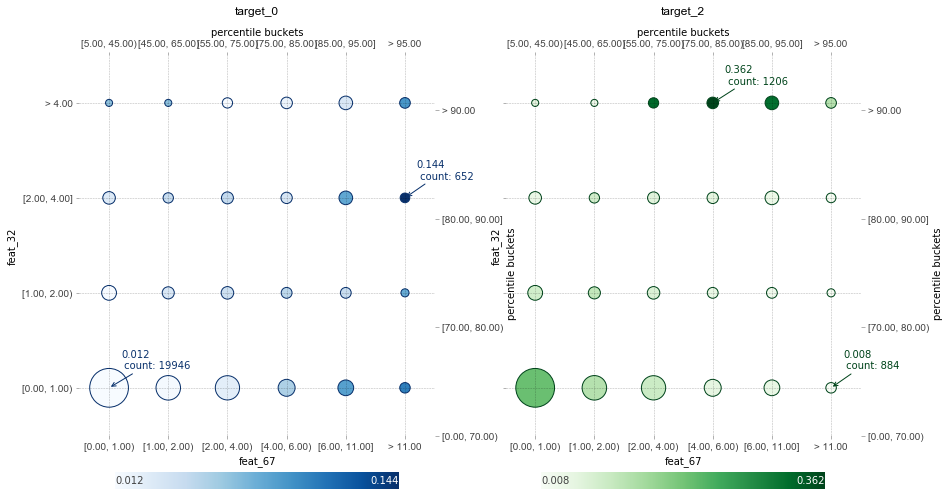

In [42]:
axes, df = target_plot_interact(df=otto_data, features=['feat_67', 'feat_32'], feature_names=['feat_67', 'feat_32'], 
                                target=['target_0', 'target_2'], figsize=(14, 8), 
                                show_percentile=True, percentile_ranges=[(5, 95), (0, 90)], show_outliers=True)

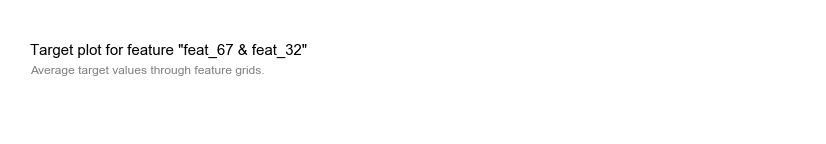

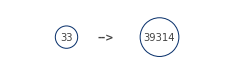

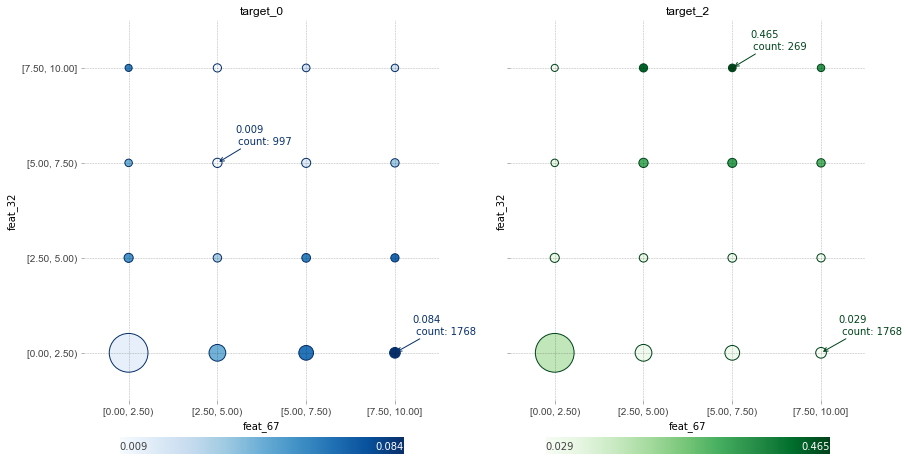

In [47]:
axes, df = target_plot_interact(df=otto_data, features=['feat_67', 'feat_32'], feature_names=['feat_67', 'feat_32'], 
                                target=['target_0', 'target_2'], figsize=(14, 8), 
                                show_percentile=True, grid_ranges=[(0, 10), (0, 10)], grid_types=['equal', 'equal'], 
                                num_grid_points=[5, 5])

In [48]:
df

,x1,x2,display_column_1,display_column_2,count,target_0,target_2
0,0,0,"[0.00, 2.50)","[0.00, 2.50)",39314,0.015465,0.147734
1,0,1,"[0.00, 2.50)","[2.50, 5.00)",939,0.054313,0.061768
2,0,2,"[0.00, 2.50)","[5.00, 7.50)",200,0.045000,0.070000
3,0,3,"[0.00, 2.50)","[7.50, 10.00]",33,0.060606,0.030303
4,1,0,"[2.50, 5.00)","[0.00, 2.50)",6273,0.045752,0.050215
5,1,1,"[2.50, 5.00)","[2.50, 5.00)",608,0.034539,0.067434
6,1,2,"[2.50, 5.00)","[5.00, 7.50)",997,0.009027,0.289870
7,1,3,"[2.50, 5.00)","[7.50, 10.00]",505,0.009901,0.419802
8,2,0,"[5.00, 7.50)","[0.00, 2.50)",4571,0.064319,0.049005
9,2,1,"[5.00, 7.50)","[2.50, 5.00)",727,0.060523,0.050894


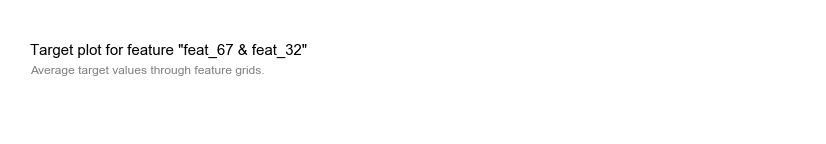

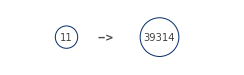

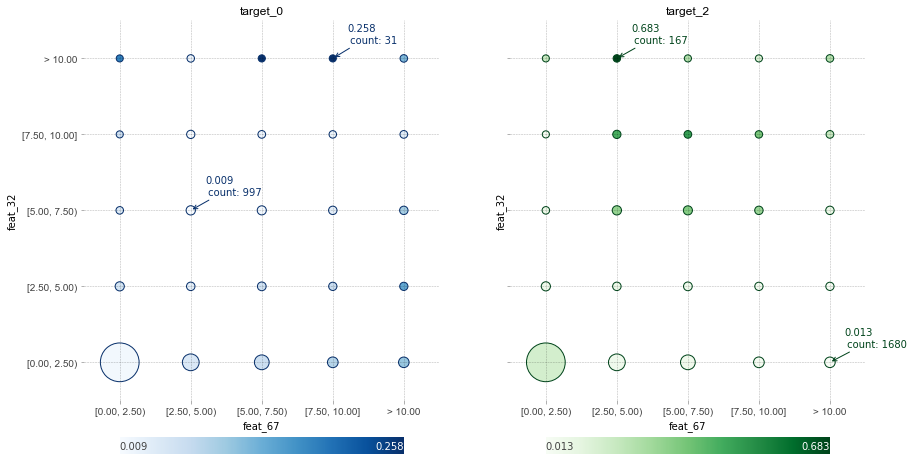

In [49]:
axes, df = target_plot_interact(df=otto_data, features=['feat_67', 'feat_32'], feature_names=['feat_67', 'feat_32'], 
                                target=['target_0', 'target_2'], figsize=(14, 8), 
                                show_percentile=True, grid_ranges=[(0, 10), (0, 10)], grid_types=['equal', 'equal'], 
                                num_grid_points=[5, 5], show_outliers=True)

In [50]:
df

,x1,x2,display_column_1,display_column_2,count,target_0,target_2
0,0,0,"[0.00, 2.50)","[0.00, 2.50)",39314,0.015465,0.147734
1,0,1,"[0.00, 2.50)","[2.50, 5.00)",939,0.054313,0.061768
2,0,2,"[0.00, 2.50)","[5.00, 7.50)",200,0.045000,0.070000
3,0,3,"[0.00, 2.50)","[7.50, 10.00]",33,0.060606,0.030303
4,0,4,"[0.00, 2.50)",> 10.00,11,0.181818,0.181818
5,1,0,"[2.50, 5.00)","[0.00, 2.50)",6273,0.045752,0.050215
6,1,1,"[2.50, 5.00)","[2.50, 5.00)",608,0.034539,0.067434
7,1,2,"[2.50, 5.00)","[5.00, 7.50)",997,0.009027,0.289870
8,1,3,"[2.50, 5.00)","[7.50, 10.00]",505,0.009901,0.419802
9,1,4,"[2.50, 5.00)",> 10.00,167,0.023952,0.682635


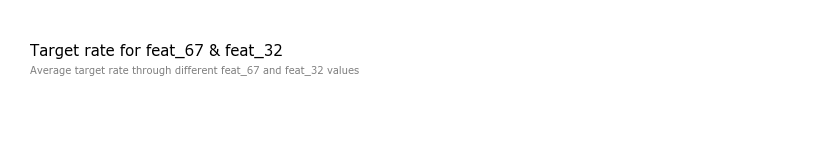

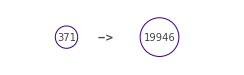

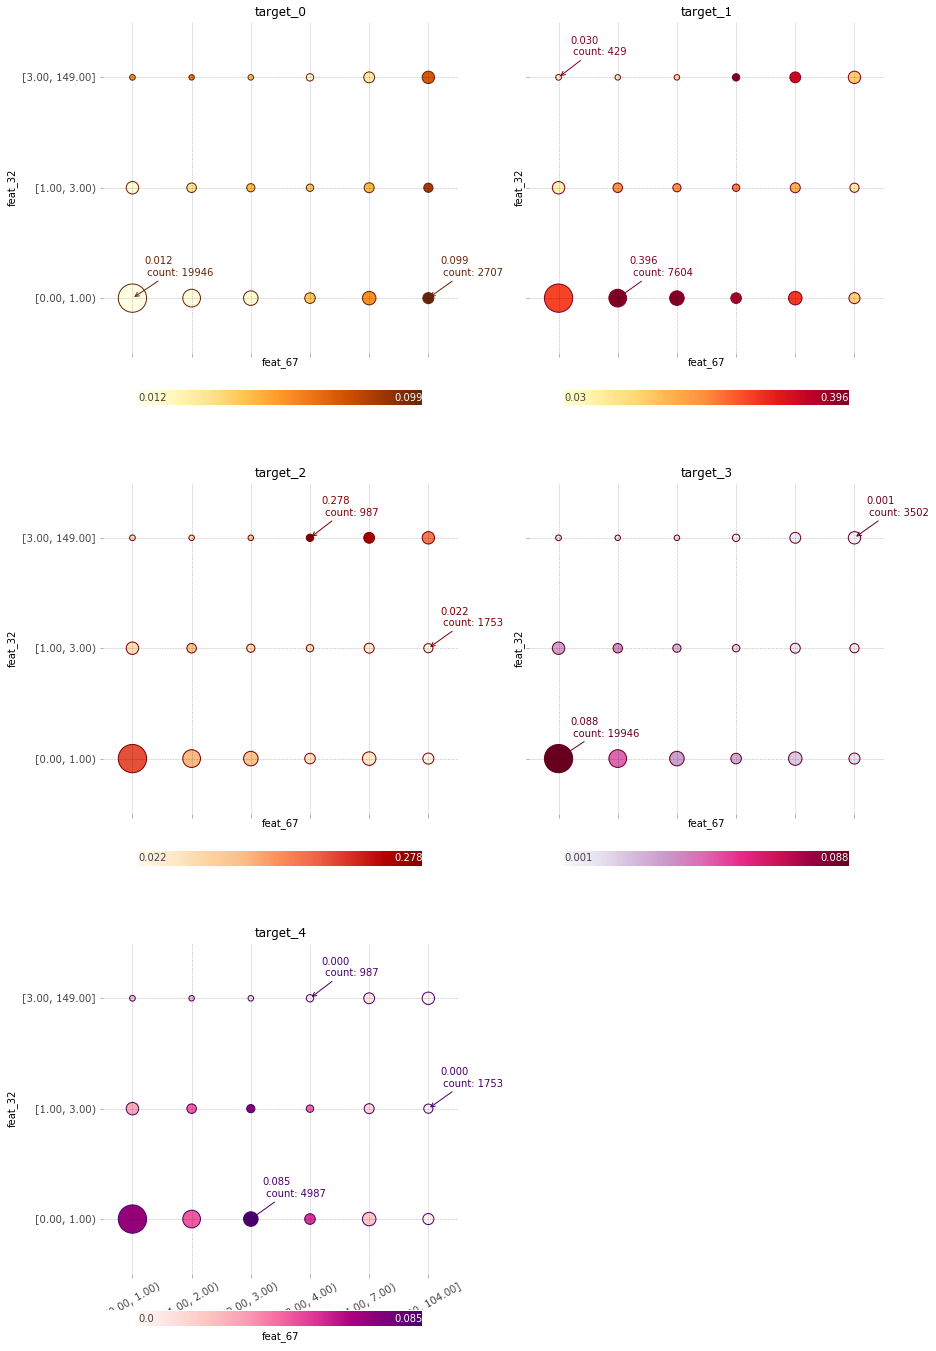

In [55]:
# use plot_params
plot_params = {
    'font_family': 'Verdana',
    'title': 'Target rate for feat_67 & feat_32',
    'subtitle': 'Average target rate through different feat_67 and feat_32 values',
    'title_fontsize': 15,
    'subtitle_fontsize': 10,
    'cmap': 'Purples',
    'cmaps': ['YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu', 'GnBu', 'PuBu'],
    'line_width': 1,
    'xticks_rotation': 30,
    'marker_size_min': 30,
    'marker_size_max': 800
}
axes, df = target_plot_interact(df=otto_data, features=['feat_67', 'feat_32'], feature_names=['feat_67', 'feat_32'], 
                                target=['target_0', 'target_1', 'target_2', 'target_3', 'target_4'], 
                                figsize=(14, 24), plot_params=plot_params)